In [44]:
# !pip install neattext
# !pip install wordcloud
# !pip install nltk

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import neattext.functions as nfx
import nltk
from nltk.corpus import stopwords
import re

import neattext as nt

In [46]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [47]:
print('Train data shape:', train_df.shape)
print('Train columns:', train_df.columns)
print('Test data shape:', test_df.shape)
print('Test columns:', test_df.columns)

Train data shape: (7613, 5)
Train columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Test data shape: (3263, 4)
Test columns: Index(['id', 'keyword', 'location', 'text'], dtype='object')


In [48]:
train_df = train_df.drop(['id'], axis = 1)
test_df = test_df.drop(['id'], axis = 1)

In [49]:
print('Number of duplicated text on train data: ',train_df.duplicated(['text']).sum())
print('Number of duplicated text on test data: ',test_df.duplicated(['text']).sum())

Number of duplicated text on train data:  110
Number of duplicated text on test data:  20


In [50]:
train_df[train_df['text'].duplicated() == True].sort_values(by=['text'])

,keyword,location,text,target
4299,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...
3461,exploded,NaN,that exploded &amp; brought about the\r\nbegin...,0
6103,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,sinking,MA,that horrible sinking feeling when youÛªve be...,1


In [51]:
train_df = train_df.drop_duplicates(subset=['text'])
train_df

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7604,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


In [52]:
def missing_ratio(_df):
    missing_cols = _df.columns[_df.isnull().any()]
    plt.subplots(figsize=(6, 6))
    missing_ratio = _df[missing_cols].isnull().sum() * 100 / len(_df)
    missing_ratio.sort_values(inplace=True)
    missing_ratio.plot.bar(missing_ratio)
    return missing_ratio

keyword      0.746368
location    33.080101
dtype: float64

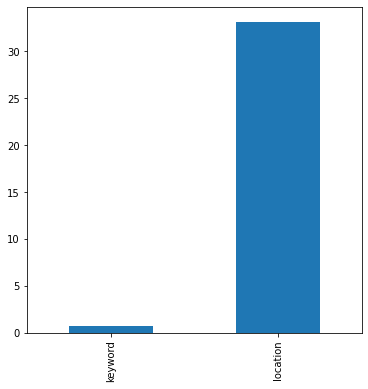

In [53]:
train_missing = missing_ratio(train_df)
train_missing

keyword      0.796813
location    33.864542
dtype: float64

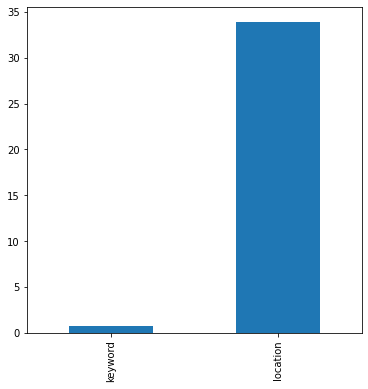

In [54]:
test_missing = missing_ratio(test_df)
test_missing

In [55]:
def clean_text(text):
    text = re.sub(r"(?:\@)\S+", "", text)
    text = text.lower()
    docx = nt.TextFrame(text=text)
    docx.normalize()
    docx.remove_urls()
    docx.remove_emojis()
    docx.remove_emails()
    docx.remove_puncts()
    docx.remove_special_characters()
    docx.remove_numbers()
    docx.remove_stopwords()
    docx.fix_contractions()
    return docx.text

In [56]:
train_df['text']=train_df['text'].apply(lambda x: clean_text(x))
test_df['text']=test_df['text'].apply(lambda x: clean_text(x))

In [57]:
train_df['text']

0                   deeds reason earthquake allah forgive
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7604    worldnews fallen powerlines glink tram update ...
7605        flip im walmart bomb evacuate stay tuned blow
7606    suicide bomber kills saudi security site mosqu...
7608    giant cranes holding bridge collapse nearby homes
7612    latest homes razed northern california wildfir...
Name: text, Length: 7503, dtype: object

In [58]:
test_df['text']

0                             happened terrible car crash
1             heard earthquake different cities stay safe
2         forest fire spot pond geese fleeing street save
3                   apocalypse lighting spokane wildfires
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles safety fasteners...
3259    storm ri worse hurricane cityampothers hardest...
3260                        green line derailment chicago
3261             meg issues hazardous weather outlook hwo
3262    cityofcalgary activated municipal emergency pl...
Name: text, Length: 3263, dtype: object

In [59]:
train_df.to_csv('train_preprocessing.csv')
test_df.to_csv('test_preprocessing.csv')

## Khám phá dữ liệu

In [60]:
count_target = train_df.groupby("target").count()
count_target = count_target.rename(columns={"text": "count"})
fig = px.bar(count_target, x=count_target.index, y='count')
fig.update_layout(xaxis={'type': 'category'}, title={
            'text': 'Phân bố cột target',
            'x': 0.5,  # Giữa trục x
            'xanchor': 'center',  # Căn giữa theo trục x
            'yanchor': 'top'  # Căn theo trục y
        })
fig.show()

In [61]:
top_key_word = train_df.groupby(["keyword"])["target"].mean().reset_index().sort_values(by = 'target', ascending=False)
top_key_word = pd.concat([top_key_word.head(10), top_key_word.tail(10)])
top_key_word = top_key_word["keyword"]

target_by_keyword = train_df.groupby(["keyword", "target"])["text"].count().reset_index()
target_by_keyword = target_by_keyword.rename(columns={"text": "count"})
target_by_keyword = target_by_keyword[target_by_keyword["keyword"].isin(top_key_word)]
target_by_keyword = target_by_keyword.sort_values(by=["target", "count"], ascending=[True, False])
target_by_keyword['target'] = target_by_keyword['target'].astype(object)
fig = px.bar(target_by_keyword, x="keyword", y='count', color="target")
fig.update_layout(xaxis={'type': 'category'}, title={
            'text': 'Top 10 keyword có khả năng thấp là thảm họa và có khả cao là thảm họa',
            'x': 0.5,  # Giữa trục x
            'xanchor': 'center',  # Căn giữa theo trục x
            'yanchor': 'top'  # Căn theo trục y
        })


fig.show()

### Tách ra 2 biểu đồ


In [62]:
top_location = train_df.groupby("location")["target"].count().sort_values(ascending=False).head(20)


fig = px.bar(top_location, x=top_location.index, y=top_location.values)
fig.update_layout(xaxis={'type': 'category'}, 
                yaxis_title = "Số lượng",
                xaxis_title = "Địa điểm",
                title={
                    'text': 'Top 20 địa điểm có nhiều tweet nhất',
                    'x': 0.5,  # Giữa trục x
                    'xanchor': 'center',  # Căn giữa theo trục x
                    'yanchor': 'top'  # Căn theo trục y
                })


fig.show()



In [63]:
location_df = train_df[train_df["location"].isin(top_location.index)]
location_target = location_df.groupby("location")["target"].mean().sort_values(ascending=False)

fig = px.bar(location_target, x=location_target.index, y=location_target.values)
fig.update_layout(xaxis={'type': 'category'}, 
                yaxis_title = "Target",
                xaxis_title = "Địa điểm",
                title={
                    'text': 'Target trung bình của các địa phương có nhiều tweet nhất',
                    'x': 0.5,  # Giữa trục x
                    'xanchor': 'center',  # Căn giữa theo trục x
                    'yanchor': 'top'  # Căn theo trục y
                })


fig.show()

Nhận xét: Ghép mấy cái thành phố
THêm đường tham chiếu

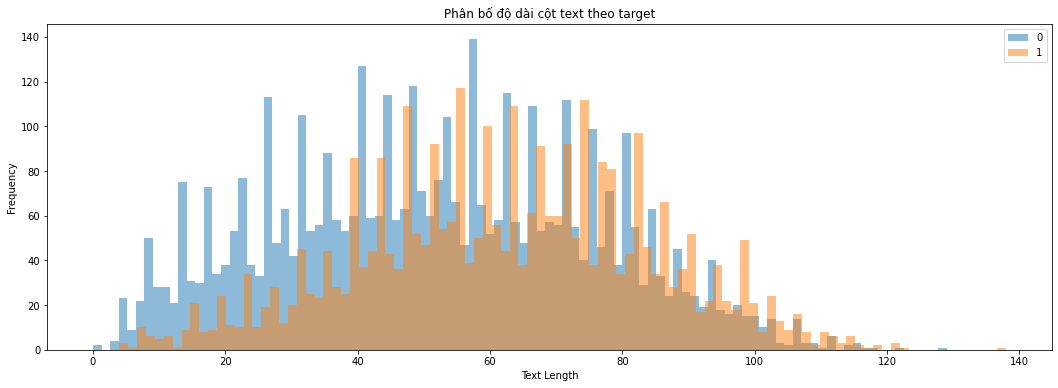

In [64]:
df_with_text_length = train_df.copy()
df_with_text_length['text_length'] = df_with_text_length['text'].apply(len)


# Tách dữ liệu cho mỗi target
target_0 = df_with_text_length[df_with_text_length['target'] == 0]['text_length']
target_1 = df_with_text_length[df_with_text_length['target'] == 1]['text_length']

# Vẽ histogram
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.hist(target_0, bins=100, alpha=0.5, label='0')
plt.hist(target_1, bins=100, alpha=0.5, label='1')

# Đặt tên trục và tiêu đề
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title("Phân bố độ dài cột text theo target")

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

## CHỉnh màu cho histogram

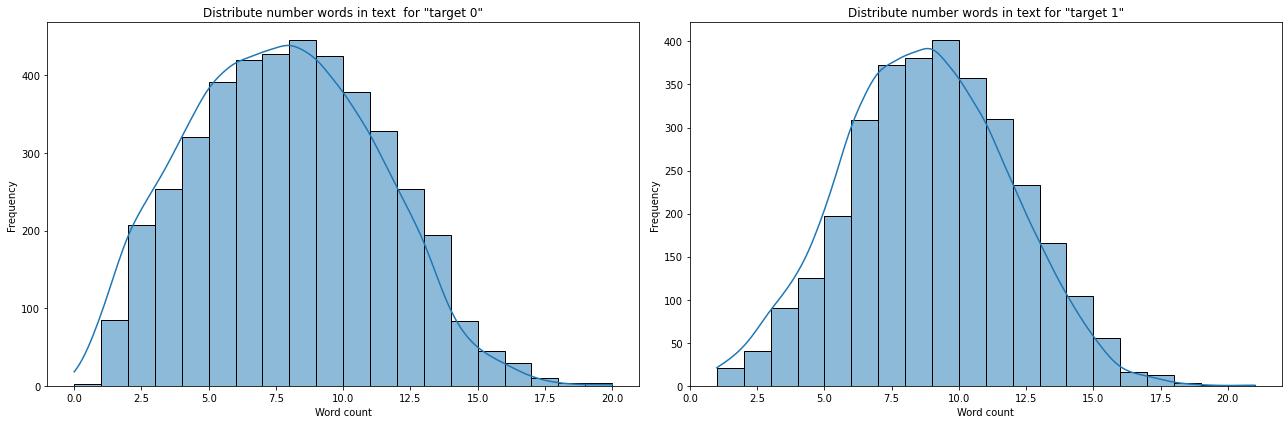

In [65]:

df_with_word_count = train_df.copy()
df_with_word_count['word_count'] = train_df['text'].str.split().map(lambda x: len(x))


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data=df_with_word_count[df_with_word_count['target'] == 0], x='word_count', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribute number words in text  for "target 0"')
axes[0].set_xlabel('Word count')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df_with_word_count[df_with_word_count['target'] == 1], x='word_count', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribute number words in text for "target 1"')
axes[1].set_xlabel('Word count')
axes[1].set_ylabel('Frequency')

# Hiển thị biểu đồ
plt.tight_layout()

plt.show()

In [66]:
# Tạo một chuỗi từ tất cả các câu trong cột "text"
text_combined = ' '.join(train_df['text'])

# Khởi tạo đối tượng WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Vẽ word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Words')
plt.show()

ValueError: Only supported for TrueType fonts

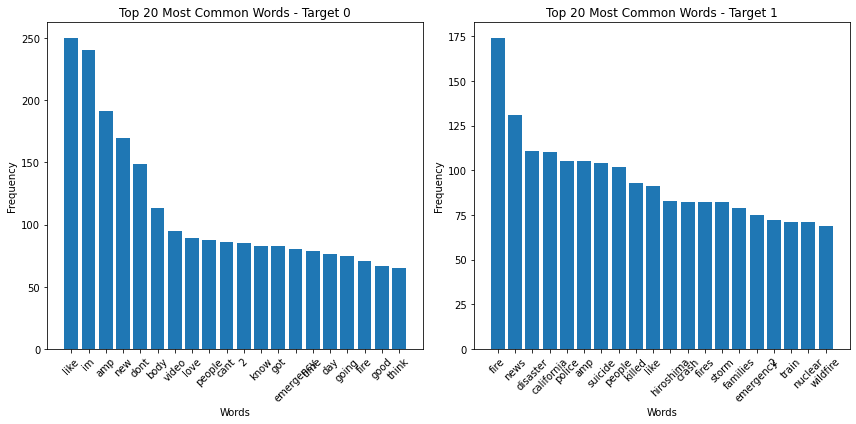

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Tách các từ trong cột "text" với target = 0
words_0 = train_df['text'][train_df["target"] == 0].str.split()
all_words_0 = [word for sublist in words_0 for word in sublist]
word_counts_0 = Counter(all_words_0)
top_20_words_0 = word_counts_0.most_common(20)
word_list_0, word_count_0 = zip(*top_20_words_0)

# Tách các từ trong cột "text" với target = 1
words_1 = train_df['text'][train_df["target"] == 1].str.split()
all_words_1 = [word for sublist in words_1 for word in sublist]
word_counts_1 = Counter(all_words_1)
top_20_words_1 = word_counts_1.most_common(20)
word_list_1, word_count_1 = zip(*top_20_words_1)

# Vẽ biểu đồ subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ cho target = 0
axes[0].bar(word_list_0, word_count_0)
axes[0].set_title('Top 20 Most Common Words - Target 0')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ cho target = 1
axes[1].bar(word_list_1, word_count_1)
axes[1].set_title('Top 20 Most Common Words - Target 1')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
